In [2]:
import os
import tarfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Define file paths
tgz_path = "/kaggle/input/lfwpeople/lfw-funneled.tgz"
extract_path = "/kaggle/working/lfw_faces"

# Extract once
if not os.path.exists(extract_path):
    with tarfile.open(tgz_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print("Dataset extracted successfully.")
else:
    print(" Dataset already extracted.")

Dataset extracted successfully.


In [4]:
# Check what's inside extract_path
os.listdir(extract_path)

['lfw_funneled']

In [5]:
# Go inside the Data
nested_path = os.path.join(extract_path, "lfw_funneled")

# List all people (folders)
people = sorted([
    p for p in os.listdir(nested_path)
    if os.path.isdir(os.path.join(nested_path, p))
])

print(" Total people found:", len(people))
print(" First 10 people:", people[:10])

 Total people found: 5749
 First 10 people: ['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban']


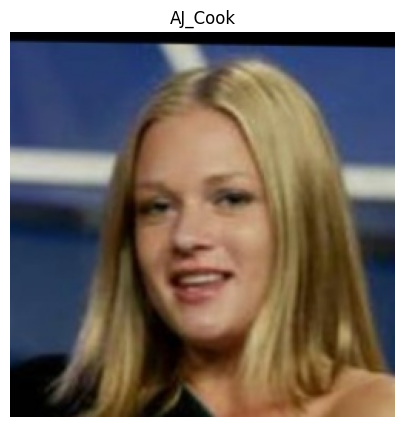

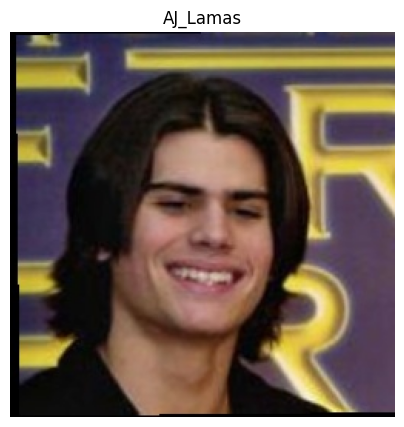

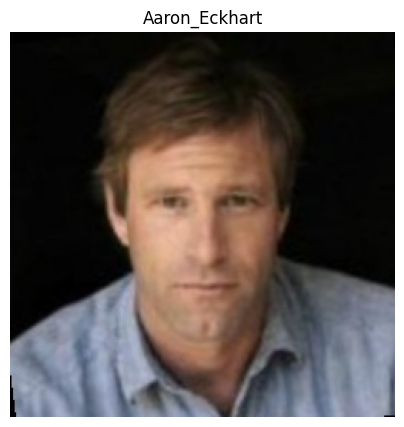

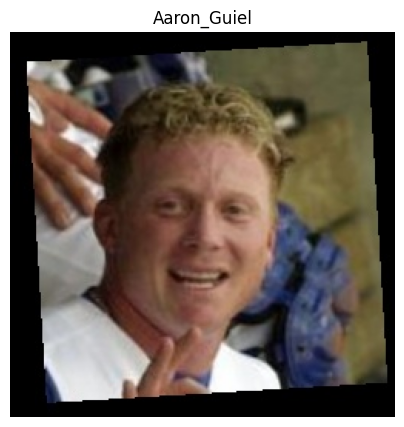

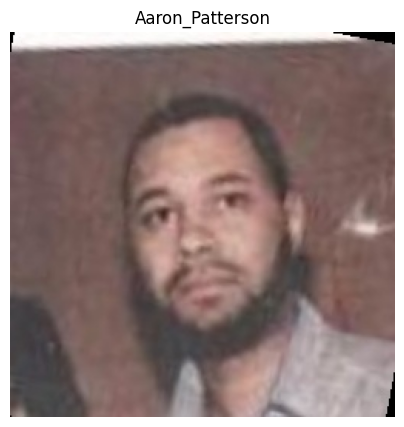

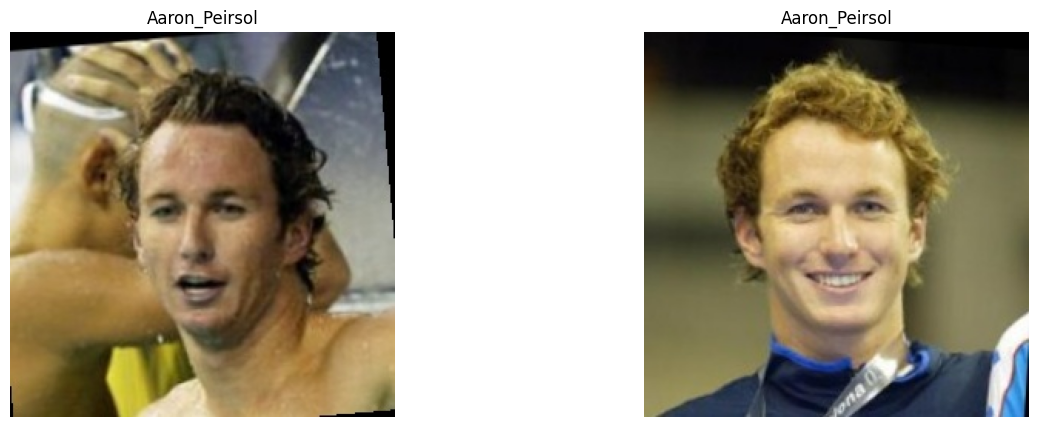

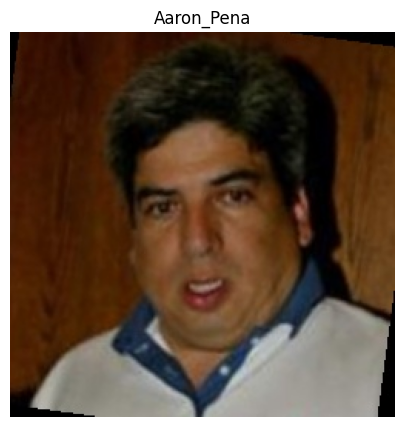

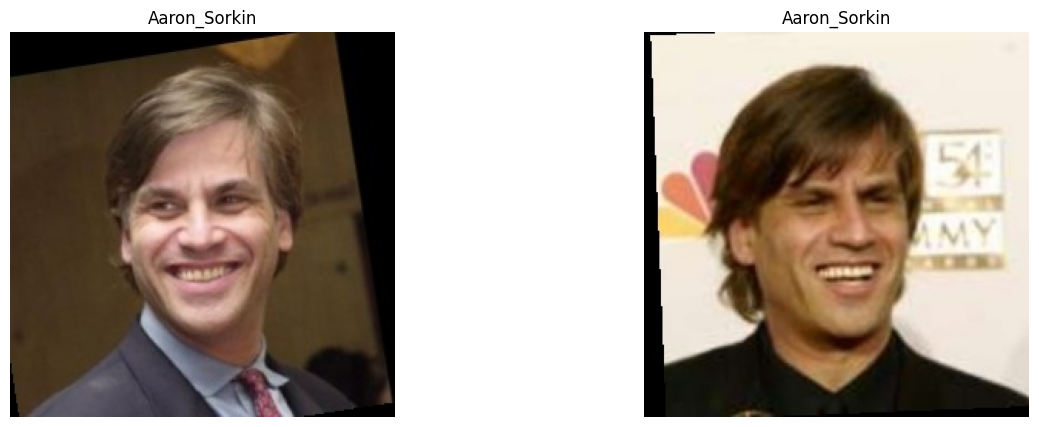

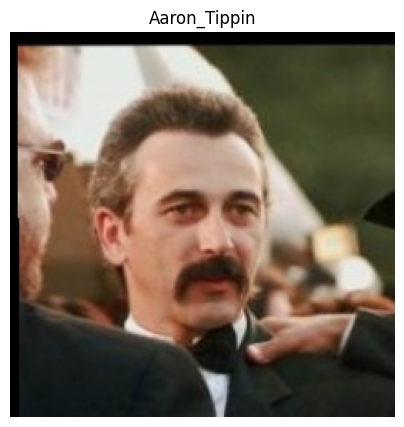

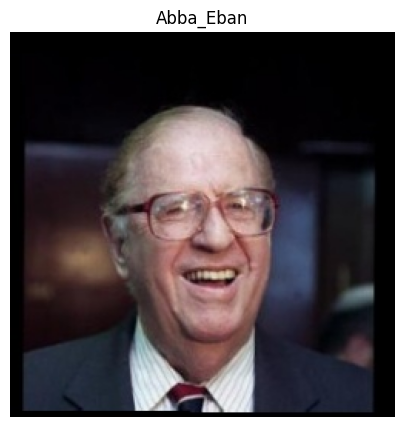

In [7]:
def show_faces(person, num=2):
    person_dir = os.path.join(nested_path, person)
    images = os.listdir(person_dir)[:num]

    plt.figure(figsize=(15,5))
    for i, image in enumerate(images):
        img_path = os.path.join(person_dir, image)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(person)
        plt.axis('off')
    plt.show()
for person in people[:10]:
    show_faces(person)

In [8]:
import shutil

dataset_path = "/kaggle/working/faces_dataset"
os.makedirs(dataset_path, exist_ok=True)

for person in tqdm(people):
    person_dir = os.path.join(nested_path, person)
    images = os.listdir(person_dir)

    if len(images) < 2:
        continue 

    dest_dir = os.path.join(dataset_path, person)
    os.makedirs(dest_dir, exist_ok=True)

    for img_name in images:
        src_path = os.path.join(person_dir, img_name)
        dst_path = os.path.join(dest_dir, img_name)
        shutil.copy(src_path, dst_path)


#so, faces_dataset is the filtered one by more than or equal images 
#lfw_faces is the original one




100%|██████████| 5749/5749 [00:01<00:00, 5148.50it/s]


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Img_size=100
batch_size=32
train_gen=ImageDataGenerator(rescale=1/255,
                             validation_split=0.2)
train_data=train_gen.flow_from_directory(
    dataset_path,
    target_size=(Img_size,Img_size),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training'
)

val_data=train_gen.flow_from_directory(
    dataset_path,
    target_size=(Img_size,Img_size),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation'
)

2025-10-31 12:00:12.125440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761912012.377392      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761912012.441631      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8092 images belonging to 1680 classes.
Found 1072 images belonging to 1680 classes.
